In [1]:
# General libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import random
from random import randrange

In [ ]:
#data = pd.read_csv('train.txt', sep='\t', header=None)

In [2]:
dictionary = defaultdict(list)
data = pd.DataFrame([])

file = open('data/train.txt', 'r') 
lines = file.readlines() 
count = 0
for line in lines: 
    count = count + 1
    split_string = list(map(int,line.strip().split("\t")))
    dictionary[split_string[0]] = []
    if (len(split_string) >1):
        dictionary[split_string[0]] = sorted(split_string[1:len(split_string)-2])
        
    data = data.append(pd.DataFrame({'Source': split_string[0], 'Source_Followings': len(dictionary[split_string[0]]) }, index=[0]), ignore_index=True)

    
    #print("Line {}: {}".format(count, line.strip()))
    #print("Line {}: {}".format(count, split_string))
    
    #if (len(split_string) < 100):
        #for i in range(1,len(split_string)):
            #data = data.append(pd.DataFrame({'Source': split_string[0], 'Sink': split_string[i]}, index=[0]), ignore_index=True)


In [97]:
len(dictionary)

20000

In [165]:
data.tail(10)

,Source,Source_Followings
19990,930244,1326
19991,4230790,133
19992,837929,0
19993,4592066,73
19994,4778890,662
19995,585576,62
19996,505961,537
19997,125824,43
19998,896087,217
19999,3547024,61


In [27]:
def calculateFollowers(data,index):
    source = data.at[index,'Source']
    followers = 0
    for j in range(0,19999):
        node = data.at[j,'Source']
        if source in dictionary[node]:
            followers = followers + 1
    data.at[index, 'Source_Followers'] = followers 
    
    return data

In [29]:
data = calculateFollowers(data,19999)
data.tail(10)

,Source,Source_Followings,Source_Followers
19990,930244,1326,
19991,4230790,133,
19992,837929,0,
19993,4592066,73,
19994,4778890,662,
19995,585576,62,
19996,505961,537,
19997,125824,43,
19998,896087,217,
19999,3547024,61,4


In [ ]:
train_data = pd.DataFrame([])
for i in range(1,100):
    x = randrange(0, 19999)
    source = data.at[x,'Source']
    source_followings = data.at[x,'Source_Followings']
    if (source_followings > 0):
        y = random.randint(0, source_followings-1)
        sink = dictionary[source][y]
        
        data = calculateFollowers(data,x)
        source_followers = data.at[x,'Source_Followers']
        train_data = train_data.append(pd.DataFrame({'Source': source,'Sink': sink,
                                                     'Source_Followings': source_followings,
                                                     'Source_Followers': source_followers,}, index=[0]), ignore_index=True)

In [31]:
train_data.head(10)

,Source,Sink,Source_Followings,Source_Followers
0,1030920,1179673,68,46
1,2788949,2118539,1948,134
2,3141618,1302377,588,176
3,2183328,639712,65,43
4,892466,3258271,57,16
5,1806155,3833331,14,1
6,3552708,3440369,521,45
7,3302638,4145463,510,148
8,3622518,4262689,777,135
9,364260,2588650,68,14


array([[<AxesSubplot:title={'center':'followers'}>]], dtype=object)

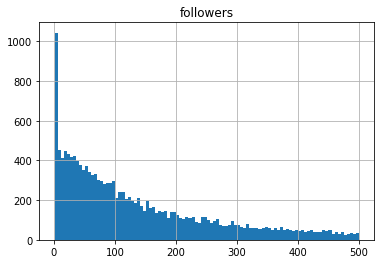

In [65]:
#data.nlargest(50,'followers')
data.hist(column='Source_Followings',bins=100, range=(1,500))

# 